In [10]:
import sys

my_path = r"C:\Users\alomb\OneDrive\new_racine\Documents\_Pro\CODE\Data_analysis"
if my_path not in sys.path : sys.path.append(my_path); print("path added")

from f_analyse import * 

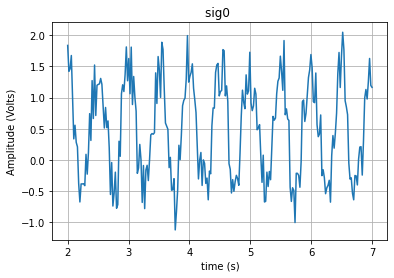

In [11]:
fs = 50
X = np.linspace(0,10,5*fs)
Y = np.cos(2*np.pi*X) + 0.2*np.cos(1.56*2*np.pi*X) + 1*np.random.random(size=len(X))

sig0 = T_signal(data = Y,
                fs = fs,
                unit = 'Volts',
                name = 'sig0',
                t0 = 2)

sig0.plot()

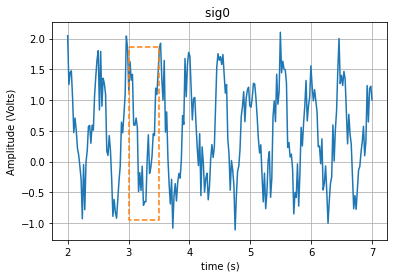

In [6]:
sig0.plot()
sig0.plot_ADD_box_on_recut(3,3.5)

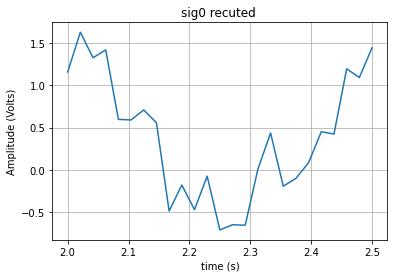

In [7]:
sig0.recut(3,3.5).plot()

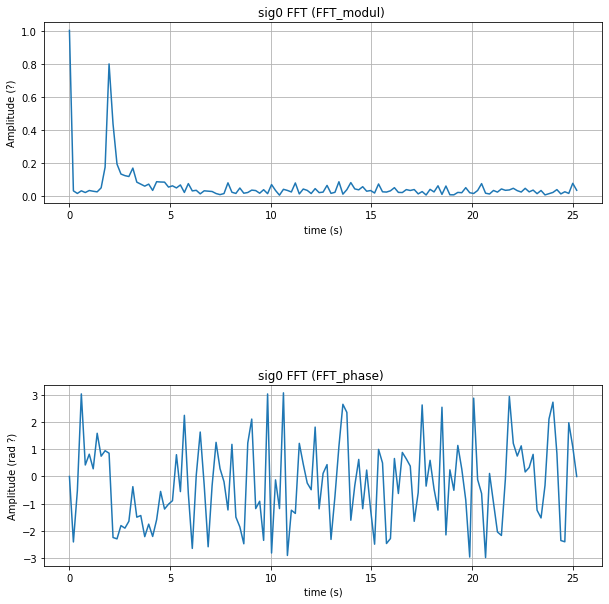

In [12]:
sig0_fft = sig0.fft()
sig0_fft.plot(figsize=(10,10))

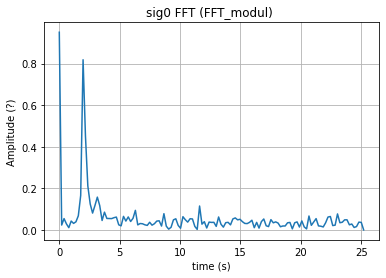

In [9]:
sig0_fft.Modul.plot()

# Zero Pading

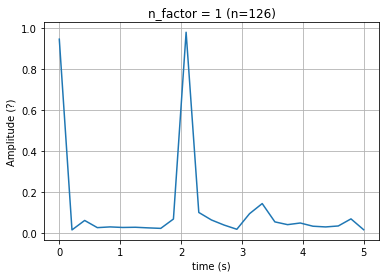

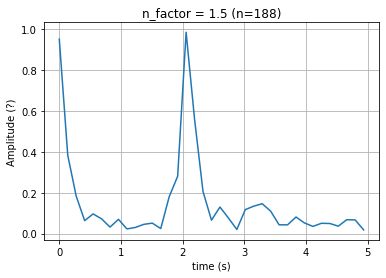

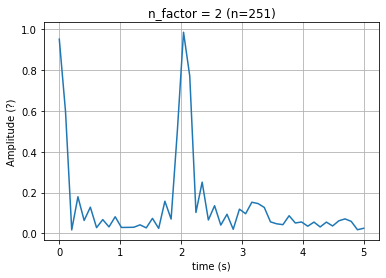

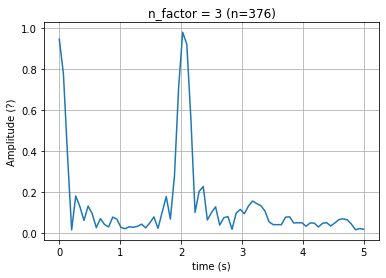

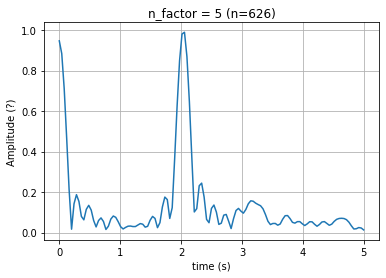

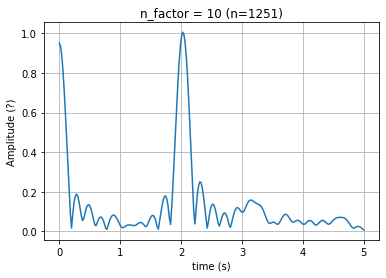

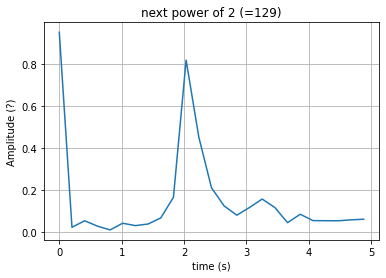

In [10]:
for n_factor in [1,1.5,2,3,5,10] :
    Sfft = sig0.fft(choose_next_power_of_2=False,n_factor=n_factor)
    n_used = Sfft.N
    Sfft.Modul.recut(0,5).plot()
    plt.title(f"n_factor = {n_factor} (n={n_used})")
Sfft = sig0.fft(choose_next_power_of_2=True)
n_used = Sfft.N
Sfft.Modul.recut(0,5).plot()
plt.title(f"next power of 2 (={n_used})");

# Sum

In [22]:
print(type(sig0))
sig0 + 1
sig1 = sig0 + 1
sig1 = sig0 + 1.5
sig1 = sig0 + sig0.mean()

sig1 = 1.5 + sig0
sig1 = 1 + sig0

sig1 = sig0 + sig0


<class 'f_analyse.T_signal'>


AttributeError: 'NoneType' object has no attribute '__add__'

In [26]:
print(type(sig0.SIG))
print(type(sig0))

<class 'NoneType'>
<class 'f_analyse.T_signal'>


# Multiplication

In [ ]:
sig

In [13]:
sig1.plot()

AttributeError: 'NoneType' object has no attribute 'plot'

AttributeError: 'NoneType' object has no attribute 'plot'

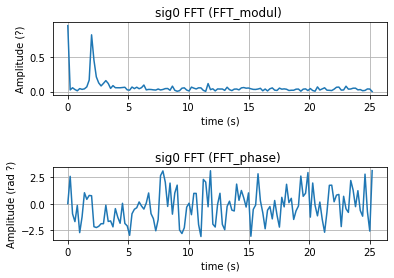

In [12]:
sig0_fft.plot()
sig1.plot()